### Download Modules

In [1]:
%%capture
!pip install PubChemPy

In [22]:
import pandas as pd
from openbabel import pybel

# Import modules
import nglview as nv
import ase.io

# Load psi4 to compute orbitals
import psi4


### Download UV-Vis data

In [1]:
! wget https://raw.githubusercontent.com/PNNL-CompBio/ML_UVvisModels/main/Data/UV_w_SMILES.csv

--2024-07-02 04:08:38--  https://raw.githubusercontent.com/PNNL-CompBio/ML_UVvisModels/main/Data/UV_w_SMILES.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3442000 (3.3M) [text/plain]
Saving to: ‘UV_w_SMILES.csv.1’

UV_w_SMILES.csv.1   100%[===================>]   3.28M  --.-KB/s    in 0.04s   

2024-07-02 04:08:38 (82.4 MB/s) - ‘UV_w_SMILES.csv.1’ saved [3442000/3442000]



### Load data in Pandas

In [5]:
import pandas as pd

In [6]:
# Define the file path to the CSV file containing UV-Vis data with SMILES strings
uvvis_file = "UV_w_SMILES.csv"

# Read the CSV file into a pandas DataFrame
uvvis_data = pd.read_csv(uvvis_file,header=None)

# Display the contents of the DataFrame
uvvis_data

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
0,NC1=NC2=C(C=CC=C2)[N+]([O-])=N1,0.299539,0.311787,0.328491,0.349915,0.376548,0.408694,0.446354,0.489792,0.537421,...,0.092434,0.095006,0.097484,0.099952,0.102239,0.104428,0.106597,0.108721,0.110758,0.112611
1,NC1=NC2=C(C=CC=C2)N=N1,0.411922,0.447550,0.487158,0.530422,0.576958,0.626523,0.678088,0.731087,0.783621,...,0.094415,0.095031,0.095445,0.095832,0.095950,0.095919,0.095820,0.095594,0.095204,0.094772
2,CCC1=[N+]([O-])C2=C(C=CC=C2)[N+]([O-])=N1,0.732482,0.794217,0.853497,0.907398,0.952023,0.983787,1.000000,0.998714,0.982111,...,0.398864,0.409874,0.420358,0.429326,0.437889,0.445579,0.452843,0.459056,0.464107,0.468328
3,CN(C)CC1=CNC2=CC=C(C=C12)[N+]([O-])=O,0.412611,0.399813,0.390055,0.382307,0.376957,0.373062,0.371521,0.370622,0.371992,...,0.033980,0.029478,0.024774,0.020789,0.017146,0.013311,0.009733,0.006266,0.003120,0.000000
4,NC(=N)SCCN1C(=O)C2=CC=CC=C2C1=O,0.991241,1.000000,0.996943,0.979253,0.944010,0.890630,0.820660,0.739217,0.655266,...,0.000543,0.000694,0.000529,0.000495,0.000374,0.000433,0.000577,0.000560,0.000574,0.000412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,c1csc(c1)-c1ncc2ccccn12,0.780693,0.749204,0.723286,0.700154,0.678959,0.664063,0.651104,0.639720,0.630878,...,0.022660,0.018397,0.015018,0.011409,0.009047,0.006746,0.004517,0.002713,0.001453,0.000000
928,c1coc(c1)-c1ccnc2nncn12,0.646698,0.659208,0.668289,0.674135,0.676552,0.674330,0.668094,0.656831,0.642216,...,0.000538,0.000339,0.000440,0.000230,0.000327,0.000148,0.000129,0.000055,0.000000,0.000164
929,Nc1nc(cs1)-c1cccs1,0.588011,0.585420,0.584680,0.585494,0.588826,0.593638,0.601041,0.610887,0.623694,...,0.000496,0.000444,0.000807,0.000770,0.001036,0.000355,0.000222,0.000496,0.000000,0.000155
930,Nc1nccc(n1)-c1cccs1,0.687236,0.686341,0.680750,0.670685,0.658608,0.642728,0.622375,0.595983,0.564895,...,0.002908,0.002147,0.003086,0.002348,0.001141,0.001364,0.000470,0.000403,0.000000,0.000716


### Convert SMILES to Skeletal Structure

In [23]:
for i in range(932):
    smi_string = uvvis_data.iloc[i, 0]

In [43]:
from rdkit import Chem

# Convert the SMILES string at index 690 in the 'uvvis_data' DataFrame to an RDKit molecule object
m = Chem.MolFromSmiles(uvvis_data.iloc[35, 0])

# Display the RDKit molecule object
#m
print(uvvis_data.iloc[35,0])

CCN(CC)CCC(O)(C1=CC=CC=C1)C1=CC=CC=C1


## Convert SMILES to XYZ

[Pybel](https://open-babel.readthedocs.io/en/latest/UseTheLibrary/Python_Pybel.html) is a Python wrapper for Open Babel, a chemical toolbox designed to speak the many languages of chemical data. It simplifies the process of converting between different chemical file formats and manipulating chemical data.

For more information about Pybel and Open Babel, visit the [Open Babel website](https://openbabel.org/index.html).

In [7]:
from openbabel import pybel


# Function to convert SMILES to XYZ
def smiles_to_xyz(smiles_string):
    # Convert SMILES to molecule
    mol = pybel.readstring("smi", smiles_string)
    
    # Add hydrogens
    mol.addh()
    
    # Generate 3D coordinates
    mol.make3D()
    
    # Optimize geometry
    mol.localopt()
    
    # Get XYZ coordinates
    xyz = mol.write("xyz")

    return xyz

This cell demonstrates the conversion of a SMILES string to XYZ coordinates using the `smiles_to_xyz` function. The example uses the SMILES string for cyclohexane ("C1CCCCC1"). The function `smiles_to_xyz` takes this SMILES string and converts it into the corresponding XYZ coordinates, which are stored in the variable `cyclohexane_coordinates`.


In [26]:
# Example SMILES string
string = uvvis_data.iloc[35, 0]

# Convert to XYZ
coordinates = smiles_to_xyz(string)

## Print xyz coordinates to files

#### XYZ Coordinate Print Function

#### Gaussian Coordinate Print Function


In [33]:
def write_xyz_file(smiles, idx):

    output_dir = "xyz_files"
    os.makedirs(output_dir, exist_ok=True)
    
    xyz = smiles_to_xyz(smiles)
    lines = xyz.splitlines()
    # Replace the comment line with the SMILES string
    lines[1] = smiles
    xyz_modified = "\n".join(lines)
    
    filename = os.path.join(output_dir, f"molecule_{idx:04d}.xyz")
    with open(filename, "w") as f:
        f.write(xyz_modified)
    print(f"Written {filename}")

In [10]:
# Main function to generate Gaussian input files
def smiles_to_gaussian(smiles, filename_prefix, methods_basis, dispersion=None):
    # Step 1: Create XYZ
    xyz_str = smiles_to_xyz(smiles)
    lines = xyz_str.split("\n")
    
    # Gaussian Input
    gauss_path = f"gauss_files2/{filename_prefix}.com"
    with open(gauss_path, "w") as gauss_file:
        chk = f"{filename_prefix}.chk"
        mem = "1000mb"
        nproc = "64"

        # Write initial step with coordinates
        gauss_file.write(f"%chk={chk}\n%mem={mem}\n%nprocshared={nproc}\n")
        disp_str = f" EmpiricalDispersion={dispersion}" if dispersion else ""
        method0, basis0 = methods_basis[0]
        #gauss_file.write(f"# opt freq {method0}/{basis0}{disp_str}\n\n")
        gauss_file.write(f"# opt freq {method0}/{basis0}\n\n")
        gauss_file.write(f"{smiles} -- Step 0: Optimization + Frequency ({method0}/{basis0})\n\n0 1\n")
        gauss_file.write("\n".join(lines[2:]) + "\n\n")

        # Link1 steps
        numsteps = len(methods_basis)
        for step, (method, basis) in enumerate(methods_basis[1:], start=1):
            gauss_file.write("--Link1--\n")
            gauss_file.write(f"%chk={chk}\n%mem={mem}\n%nprocshared={nproc}\n")
            if step == numsteps-1:
                gauss_file.write(f"# TD=(nstates=20,50-50) {method}/{basis}{disp_str} geom=check guess=read\n\n")
                gauss_file.write(f"Step {step}: TDDFT ({method}/{basis})\n\n")
            else:
                gauss_file.write(f"# opt freq {method}/{basis}{disp_str} geom=check guess=read\n\n")
                gauss_file.write(f"Step {step}: Optimization + Frequency ({method}/{basis})\n\n")
            gauss_file.write("0 1\n\n")

    print(f"Generated {gauss_path}")

# Example Usage:
methods_basis = [
    ("HF", "cc-pVDZ"),
    ("B3LYP", "def2TZVP"),
    ("B3LYP", "def2TZVP")
#    ("CAM-B3LYP", "def2TZVP"),
#    ("CAM-B3LYP", "aug-cc-pVTZ")
]

import os 

# Ensure directories exist
os.makedirs("xyz_files", exist_ok=True)
#os.makedirs("gauss_files", exist_ok=True)
os.makedirs("gauss_files2", exist_ok=True)

smiles_to_gaussian("C1=CC=CC=C1", "molecule_0000", methods_basis, dispersion="GD3BJ")

Generated gauss_files2/molecule_0000.com


In [35]:
for i in range(932):
    smi_string = uvvis_data.iloc[i, 0]
    write_xyz_file(smi_string,i)
    

Written xyz_files/molecule_0000.xyz
Written xyz_files/molecule_0001.xyz
Written xyz_files/molecule_0002.xyz
Written xyz_files/molecule_0003.xyz
Written xyz_files/molecule_0004.xyz
Written xyz_files/molecule_0005.xyz
Written xyz_files/molecule_0006.xyz
Written xyz_files/molecule_0007.xyz
Written xyz_files/molecule_0008.xyz
Written xyz_files/molecule_0009.xyz
Written xyz_files/molecule_0010.xyz
Written xyz_files/molecule_0011.xyz
Written xyz_files/molecule_0012.xyz
Written xyz_files/molecule_0013.xyz
Written xyz_files/molecule_0014.xyz
Written xyz_files/molecule_0015.xyz
Written xyz_files/molecule_0016.xyz
Written xyz_files/molecule_0017.xyz
Written xyz_files/molecule_0018.xyz
Written xyz_files/molecule_0019.xyz
Written xyz_files/molecule_0020.xyz
Written xyz_files/molecule_0021.xyz
Written xyz_files/molecule_0022.xyz
Written xyz_files/molecule_0023.xyz
Written xyz_files/molecule_0024.xyz
Written xyz_files/molecule_0025.xyz
Written xyz_files/molecule_0026.xyz
Written xyz_files/molecule_0

*** Open Babel Warning  in CorrectStereoAtoms
  Could not correct 1 stereocenter(s) in this molecule ()
  with Atom Ids as follows: 13


Written xyz_files/molecule_0260.xyz
Written xyz_files/molecule_0261.xyz
Written xyz_files/molecule_0262.xyz
Written xyz_files/molecule_0263.xyz
Written xyz_files/molecule_0264.xyz
Written xyz_files/molecule_0265.xyz
Written xyz_files/molecule_0266.xyz
Written xyz_files/molecule_0267.xyz
Written xyz_files/molecule_0268.xyz
Written xyz_files/molecule_0269.xyz
Written xyz_files/molecule_0270.xyz
Written xyz_files/molecule_0271.xyz
Written xyz_files/molecule_0272.xyz
Written xyz_files/molecule_0273.xyz
Written xyz_files/molecule_0274.xyz
Written xyz_files/molecule_0275.xyz
Written xyz_files/molecule_0276.xyz
Written xyz_files/molecule_0277.xyz
Written xyz_files/molecule_0278.xyz
Written xyz_files/molecule_0279.xyz
Written xyz_files/molecule_0280.xyz
Written xyz_files/molecule_0281.xyz
Written xyz_files/molecule_0282.xyz
Written xyz_files/molecule_0283.xyz
Written xyz_files/molecule_0284.xyz
Written xyz_files/molecule_0285.xyz
Written xyz_files/molecule_0286.xyz
Written xyz_files/molecule_0

In [11]:
%%capture
# Example Usage:
# methods_basis = [
#     ("HF", "cc-pVDZ"),
#     ("B3LYP", "def2TZVP"),
#     ("CAM-B3LYP", "def2TZVP"),
#     ("CAM-B3LYP", "aug-cc-pVTZ")
# ]


methods_basis = [
    ("HF", "cc-pVDZ"),
    ("B3LYP", "aug-cc-pVDZ"),
    ("B3LYP", "aug-cc-pVDZ"),
]

for i in range(932):
    smi_string = uvvis_data.iloc[i, 0]
    prefix = f"molecule_{i:04d}"
    smiles_to_gaussian(smi_string, prefix, methods_basis, dispersion="GD3BJ")


*** Open Babel Warning  in CorrectStereoAtoms
  Could not correct 1 stereocenter(s) in this molecule ()
  with Atom Ids as follows: 13


In [12]:
! zip -r gauss_files3.zip gauss_files3

  adding: gauss_files3/ (stored 0%)
  adding: gauss_files3/molecule_0000.com (deflated 61%)
  adding: gauss_files3/.ipynb_checkpoints/ (stored 0%)
  adding: gauss_files3/.ipynb_checkpoints/molecule_0000-checkpoint.com (deflated 64%)
  adding: gauss_files3/.ipynb_checkpoints/molecule_0044-checkpoint.com (deflated 65%)
  adding: gauss_files3/.ipynb_checkpoints/molecule_0001-checkpoint.com (deflated 61%)
  adding: gauss_files3/molecule_0001.com (deflated 61%)
  adding: gauss_files3/molecule_0002.com (deflated 62%)
  adding: gauss_files3/molecule_0003.com (deflated 63%)
  adding: gauss_files3/molecule_0004.com (deflated 63%)
  adding: gauss_files3/molecule_0005.com (deflated 63%)
  adding: gauss_files3/molecule_0006.com (deflated 64%)
  adding: gauss_files3/molecule_0007.com (deflated 65%)
  adding: gauss_files3/molecule_0008.com (deflated 65%)
  adding: gauss_files3/molecule_0009.com (deflated 63%)
  adding: gauss_files3/molecule_0010.com (deflated 62%)
  adding: gauss_files3/molecule_001

In [14]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600]
y = [7.171100049981379e-94, 5.622503162719759e-93, 4.364462255958024e-92, 3.3541994606031636e-91, 2.552137910226979e-90, 1.922544965704235e-89, 1.4338574904300215e-88, 1.0587479707299749e-87, 7.739917174339526e-87, 5.6019233100074805e-86, 4.014164178292668e-85, 2.847804894447701e-84, 2.00024164569363e-83, 1.390951007568696e-82, 9.576313167256431e-82, 6.527426471793357e-81, 4.404968245488814e-80, 2.9430708995383076e-79, 1.9467752654154436e-78, 1.274935081774546e-77, 8.266420324411512e-77, 5.306449821545175e-76, 3.372467778906257e-75, 2.1220163727050086e-74, 1.3219250453769867e-73, 8.153087727855759e-73, 4.978455038526643e-72, 3.0097072748033272e-71, 1.801404018919348e-70, 1.0674688315504391e-69, 6.262626216871127e-69, 3.6376004885434802e-68, 2.0918509338340898e-67, 1.190977892763821e-66, 6.713266797786223e-66, 3.746462262165961e-65, 2.069979638292951e-64, 1.132317055483015e-63, 6.132355131004526e-63, 3.288090995834226e-62, 1.7454911447428164e-61, 9.173789555436914e-61, 4.773503093996768e-60, 2.459138368612567e-59, 1.2542556241513252e-58, 6.333539649116585e-58, 3.166389143491029e-57, 1.5672542360607638e-56, 7.6801906445399025e-56, 3.7261638362826164e-55, 1.789819785693362e-54, 8.511656531579145e-54, 4.007525729665679e-53, 1.8680823121766705e-52, 8.621308279115332e-52, 3.9391982363016086e-51, 1.7819684619444738e-50, 7.9808605897485935e-50, 3.538807924197842e-49, 1.5535378355619788e-48, 6.752184152718567e-48, 2.905523188058249e-47, 1.237833015580397e-46, 5.221045204406826e-46, 2.180271346508907e-45, 9.014079258301374e-45, 3.689690677529733e-44, 1.4952587017901624e-43, 5.999299509851842e-43, 2.3831018891955662e-42, 9.372222169595482e-42, 3.649223600012101e-41, 1.4067481429192666e-40, 5.368960937612717e-40, 2.0287204186313675e-39, 7.589484271884842e-39, 2.8109976859565493e-38, 1.0307822231590936e-37, 3.742239817884079e-37, 1.3451001800100057e-36, 4.78669797879973e-36, 1.6864592985861255e-35, 5.882666275718453e-35, 2.031566943210566e-34, 6.9461909184943074e-34, 2.3513702756134786e-33, 7.880506707746974e-33, 2.614846258947593e-32, 8.590079113697921e-32, 2.7938768001784554e-31, 8.996560887351946e-31, 2.8681713055993407e-30, 9.053011105108376e-30, 2.8290494699702245e-29, 8.75281356610225e-29, 2.681109767522051e-28, 8.13095265133021e-28, 2.441340400607757e-27, 7.257306578894486e-27, 2.1359102177729234e-26, 6.223734879505939e-26, 1.795477340103051e-25, 5.128256312346672e-25, 1.4501758796974885e-24, 4.0600652388447224e-24, 1.1254001324461122e-23, 3.088465652132209e-23, 8.391521613238907e-23, 2.257361257653057e-22, 6.012071292708283e-22, 1.5852953928234447e-21, 4.138658850171101e-21, 1.0697265439531963e-20, 2.7374740200993137e-20, 6.935722881518631e-20, 1.7397962033067705e-19, 4.3208620373568404e-19, 1.062449457522991e-18, 2.5865002897242853e-18, 6.234242683115897e-18, 1.487724039293818e-17, 3.5150311742596527e-17, 8.222516745117553e-17, 1.9043634657060487e-16, 4.3668186324706576e-16, 9.914059164583049e-16, 2.22848516673753e-15, 4.959533023989549e-15, 1.0928123397061407e-14, 2.3841039700568634e-14, 5.1496852837737686e-14, 1.1013193157842854e-13, 2.331976370842844e-13, 4.888939815969473e-13, 1.0148136881500443e-12, 2.0856457309115117e-12, 4.244035269146547e-12, 8.550733593776282e-12, 1.7057507047841783e-11, 3.3691279357593284e-11, 6.588875552302966e-11, 1.2758487867123437e-10, 2.4461528540336063e-10, 4.6437305508729995e-10, 8.72875258740085e-10, 1.6245833706959622e-09, 2.993915646413298e-09, 5.463213156239215e-09, 9.871229953013276e-09, 1.766089337832232e-08, 3.128789360388566e-08, 5.4886619254242936e-08, 9.534274397224455e-08, 1.6400029326481537e-07, 2.7934604158779434e-07, 4.711799120565619e-07, 7.870152147346914e-07, 1.3017804101021317e-06, 2.132343064689023e-06, 3.458980086085226e-06, 5.556713304467554e-06, 8.840454675899695e-06, 1.3929197153633822e-05, 2.173607368991475e-05, 3.359299942900761e-05, 5.1420795093337e-05, 7.795810641269292e-05, 0.00011706497315082073, 0.00017411937855377264, 0.00025652725700882583, 0.00037436788949545365, 0.0005411969090102091, 0.0007750277162781912, 0.0010995083460359214, 0.00154530407508083, 0.0021516857087518133, 0.002968309023100372, 0.004057151993633134, 0.005494553255505944, 0.007373268204988602, 0.00980442930329124, 0.012919266134475218, 0.016870410895681833, 0.02183258916178059, 0.02800247735710642, 0.03559750105764272, 0.04485335570540169, 0.05602005683980592, 0.06935637304806981, 0.0851225627952761, 0.10357142577129513, 0.12493778807736776, 0.14942666398919283, 0.1772004684879202, 0.2083657855258798, 0.24296031674474286, 0.28094073275706793, 0.32217221266521007, 0.3664204766227362, 0.41334708231392037, 0.4625086636805448, 0.5133606375688815, 0.5652656945364718, 0.6175071324311405, 0.669306799351649, 0.7198471047508453, 0.7682962559325881, 0.8138356062943504, 0.8556877857472127, 0.8931441450093011, 0.9255900016305598, 0.9525262377347937, 0.9735859702678219, 0.98854528733091, 0.9973274027099616, 1.0, 0.9967659858624485, 0.9879483127898188, 0.9739699282208166, 0.9553302245911248, 0.9325795758108598, 0.9062936308976624, 0.877048987664065, 0.8454016934740302, 0.8118697332390216, 0.7769202945320186, 0.7409621810815954, 0.7043433180473102, 0.667352894333735, 0.630227353595637, 0.593159203705435, 0.5563074812685964, 0.5198086886765105, 0.4837871099604841, 0.44836359178317425, 0.4136621227032714, 0.3798138279213053, 0.3469582871957825, 0.31524235163510766, 0.2848168566609527, 0.25583178669377454, 0.22843053333351054, 0.20274390263841827, 0.17888447569278135, 0.1569418230690292, 0.13697893493494345, 0.1190300728917684, 0.103100094992755, 0.08916516716805202, 0.0771746640822578, 0.06705398739412154, 0.05870799197648389, 0.05202470917267768, 0.04687908547098716, 0.04313650753654431, 0.040655951543748806, 0.03929266719578939, 0.03890037641442329, 0.039333026566335645, 0.040446183270332586, 0.04209817539715963, 0.04415111400845594, 0.04647189876336464, 0.04893330242127814, 0.05141519034772065, 0.053805891987714315, 0.056003699980790335, 0.0579184346487195, 0.05947298109516926, 0.06060468628436828, 0.06126649619123758, 0.061427719080135175, 0.061074319457775895, 0.060208676291799594, 0.0588487757004788, 0.05702684881617295, 0.05478750591942993, 0.05218545436479963, 0.049282916922455205, 0.046146886437689494, 0.04284636073322109, 0.03944969818973158, 0.03602222031741661, 0.03262416473017085, 0.02930906282403605, 0.026122584105598614, 0.02310185652969339, 0.02027524214075943, 0.017662521999741228, 0.015275425357645506, 0.013118426079541237, 0.011189724452509608, 0.00948233410247752, 0.007985200680633384, 0.006684289838353022, 0.005563595255125933, 0.004606031640210588, 0.0037941914127232624, 0.0031109561767314643, 0.0025399644725335063, 0.0020659452505705383, 0.0016749320154582099, 0.001354375788201552, 0.0010931762576873658, 0.0008816501502581214, 0.0007114543779685312, 0.000575479349396281, 0.00046772530297676835, 0.0003831719380976541, 0.00031764917901713877, 0.00026771473963298654, 0.00023054232579977266, 0.00020382282720509258, 0.00018567968736834633, 0.0001745987507212074, 0.00016937221280799916, 0.00016905578607592466, 0.00017293778889854885, 0.00018051852993770324, 0.00019149806777220255, 0.00020577016521573335, 0.00022342003086181102, 0.00024472326108927647, 0.0002701432875058787, 0.0003003246273266674, 0.0003360793595427879, 0.0003783645378579919, 0.00042824872517806674, 0.0004868665049054219, 0.0005553606858122154, 0.0006348129438873534, 0.0007261647876800497, 0.0008301319218722317, 0.0009471162253205177, 0.0010771205479325877, 0.0012196722523679546, 0.0013737617732032794, 0.0015378023468349052, 0.0017096164195942488, 0.001886453051477276, 0.0020650389321089516, 0.002241663503133344, 0.0024122962796405334, 0.002572731969664982, 0.002718756621700876, 0.002846326010743281, 0.0029517460135444745, 0.00303184399402256, 0.0030841203293996908, 0.0031068701890037535, 0.0030992674783765386, 0.0030614053463163993, 0.0029942906157920273, 0.0028997926850162403, 0.0027805505726174965, 0.0026398445774390594, 0.002481441251169446, 0.0023094218630655677, 0.0021280051701557325, 0.0019413750783652648, 0.0017535227577614042, 0.0015681110976289191, 0.0013883672456957387, 0.001217006590496045, 0.00105618914016118, 0.0009075070287832176, 0.0007720000083116465, 0.0006501943740180504, 0.0005421598825542047, 0.0004475788559288415, 0.0003658217767116326, 0.0002960241872627195, 0.00023716050378921617, 0.00018811133078839903, 0.0001477219031066727, 0.00011485029556214178, 8.840494872418583e-05, 6.737181291387456e-05, 5.083198380429018e-05, 3.7971086850001596e-05, 2.8081876326611968e-05, 2.0561572571415097e-05, 1.4905399824755276e-05, 1.0697641082918958e-05, 7.601328432954598e-06, 5.347466209867687e-06, 3.724463069498434e-06, 2.568244484270816e-06, 1.7533399220788045e-06, 1.1850943898851327e-06, 7.9304316180552e-07, 5.254093141307428e-07, 3.4463213410727434e-07, 2.2380553846020717e-07, 1.4389408691753047e-07, 9.159507505816398e-08, 5.772425742423742e-08, 3.6016511302520144e-08, 2.2248564113352864e-08, 1.3606906105815899e-08, 8.238987503575546e-09, 4.9390719862765e-09, 2.9313921693762774e-09, 1.7225012520543632e-09, 1.0020796081858815e-09, 5.771676195870979e-10, 3.2912338964443197e-10, 1.858115009317334e-10, 1.0385884558203347e-10, 5.747400293020291e-11, 3.148882503619347e-11, 1.7080419035537444e-11, 9.17270954092162e-12, 4.877011921822564e-12, 2.567243412298587e-12, 1.3379421450437073e-12, 6.903426025242106e-13, 3.526542092611625e-13, 1.7835714980134648e-13, 8.930772582542276e-14, 4.427357506876816e-14, 2.172987407924724e-14, 1.0559099493819855e-14, 5.079881829517273e-15, 2.4195655503337536e-15, 1.140980521588397e-15, 5.326919373437571e-16, 2.4622439091161677e-16, 1.1267902366937316e-16, 5.1051926342937944e-17, 2.2900145822398505e-17, 1.0170010864276435e-17, 4.471586549046817e-18, 1.946520224734588e-18, 8.389059121272447e-19, 3.579518776171612e-19, 1.512143788292173e-19, 6.32438922229593e-20, 2.6187928420974115e-20, 1.0735956809905337e-20, 4.357500256597621e-21, 1.7510201436101577e-21, 6.9662959104581895e-22, 2.7439092860343417e-22, 1.0700267522795066e-22, 4.131203394258913e-23, 1.5791216003329625e-23, 5.9760142733879144e-24, 2.239054853177889e-24, 8.305674278829338e-25, 3.0502968973444034e-25, 1.1090889685522825e-25, 3.9925256365649073e-26, 1.4229383899299132e-26, 5.020899572010772e-27, 1.754017928271772e-27, 6.066575077925304e-28, 2.0773524206972574e-28, 7.042613247698241e-29, 2.3638208196228505e-29, 7.855110933302756e-30, 2.58432510915723e-30, 8.417808213957487e-31, 2.714613231958475e-31, 8.667102878588347e-32, 2.739662068779195e-32, 8.573874006422882e-33, 2.6565271132187856e-33, 8.149077789760102e-34, 2.4749118178134656e-34, 7.441629615587863e-35, 2.2153044853383687e-35, 6.529138155122758e-36, 1.905177065841798e-36, 5.503917135541081e-37, 1.5742202104579626e-37, 4.4577543853752773e-38, 1.249752008205237e-38, 3.4688746437136085e-39, 9.532579229077057e-40, 2.5935181788767434e-40, 6.985946003970836e-41, 1.86302296265701e-41, 4.918902862312071e-42, 1.2858056799653228e-42, 3.327664155876146e-43, 8.52630163660391e-44, 2.1629125066657845e-44, 5.432181425842207e-45, 1.3507240596519744e-45, 3.3251868969867373e-46, 8.104431210690959e-47, 1.9556272288294523e-47, 4.6720412194173797e-48, 1.105056061571113e-48, 2.5877303043179135e-49, 5.999440735444179e-50, 1.3770812927377986e-50, 3.1294314638736165e-51, 7.040903078312881e-52, 1.5683693360038725e-52, 3.4587993947182534e-53, 7.551956177814725e-54, 1.632490276748125e-54, 3.4938061141749375e-55, 7.402936990578908e-56, 1.5529817801898927e-56, 3.225415906158687e-57, 6.632269133637189e-58, 1.350192261284847e-58, 2.7213609136184627e-59, 5.430423828685726e-60, 1.072848417714627e-60, 2.0984569250936315e-61, 4.063673510447964e-62, 7.791025256111915e-63, 1.4788613936070116e-63, 2.779184546402223e-64, 5.170878770537006e-65, 9.525074495471732e-66, 1.7371185625818926e-66, 3.136516643782518e-67, 5.606899696576905e-68, 9.92327512969733e-69, 1.7387787882973117e-69, 3.016412206366656e-70, 5.180767477620488e-71, 8.80956708763561e-72, 1.4831056479930828e-72, 2.4719897496062084e-73, 4.079230982549863e-74, 6.664490982361707e-75, 1.0779850228988581e-75, 1.7262970344421823e-76, 2.7370036536375245e-77, 4.296277104163323e-78, 6.676767417939889e-79, 1.0272999483387346e-79, 1.5648954927169125e-80, 2.3601003443825125e-81, 3.52397364713274e-82, 5.2094502029283944e-83, 7.624444107656005e-84, 1.1047945785486478e-84, 1.5849367622764503e-85, 2.251123898416837e-86, 3.1655116297580895e-87, 4.4070246882517316e-88, 6.074410095510981e-89, 8.289336865810396e-90, 1.119934245138996e-90, 1.4980362247522104e-91, 1.9838515051644403e-92, 2.6010761230250463e-93, 3.3764009883904587e-94, 4.339223603283778e-95, 5.521118860396026e-96, 6.955033380387578e-97, 8.674179314471145e-98, 1.0710620409423012e-98, 1.3093565205337608e-99, 1.5847408681334223e-100, 1.8989592953533157e-101, 2.2528387548758407e-102, 2.6460717528618514e-103, 3.0770190142661544e-104, 3.542548448320012e-105, 4.0379270820516273e-106, 4.556781462927492e-107, 5.09113935713141e-108, 5.6315614077168665e-109, 6.167365946809059e-110, 6.68694372036714e-111, 7.178152369236694e-112, 7.628773709220403e-113, 8.027010809115989e-114, 8.361997205444788e-115, 8.62428785292207e-116, 8.806300971255794e-117, 8.902681982755926e-118, 8.910565172370552e-119, 8.829715229071571e-120, 8.662538913644697e-121, 8.413966045601457e-122, 8.091208021183694e-123, 7.703410367556969e-124, 7.261222685793194e-125, 6.776314171929498e-126, 6.2608653768159955e-127, 5.727066858809799e-128, 5.1866530287172155e-129, 4.650495130685559e-130, 4.128271459859596e-131, 3.628226203357792e-132, 3.157021351034503e-133, 2.7196795629367916e-134, 2.3196102099694035e-135, 1.958706392685683e-136, 1.6374977993308693e-137, 1.355342835693091e-138, 1.1106434483759762e-139]

In [16]:
import matplotlib.pyplot as plt

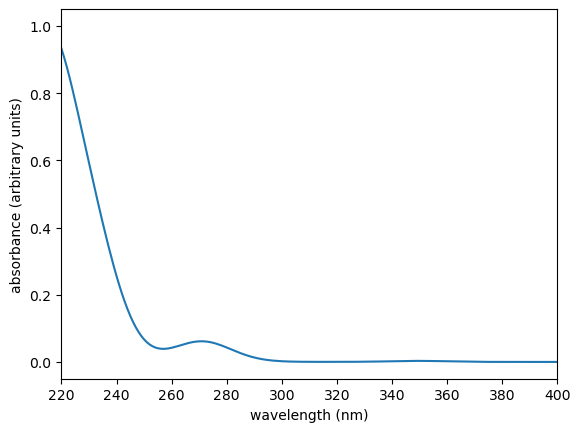

In [18]:
plt.xlabel('wavelength (nm)')
plt.ylabel('absorbance (arbitrary units)')
plt.plot(x,y)
plt.xlim(220,400)
plt.show()

## Perform geometry optimization

This section demonstrates the geometry optimization of the cyclohexane molecule using two different computational chemistry software packages: Psi4 and MOPAC. Geometry optimization is a crucial step in computational chemistry as it finds the most stable structure of a molecule by minimizing its energy. This process is necessary to accurately predict molecular properties and behavior. Using multiple software packages ensures robustness and allows for comparison of results, highlighting differences in computational methods and potential insights into molecular geometry.

#### Psi4 Optimization Function
The `optimize_with_psi4` function performs geometry optimization using the Psi4 quantum chemistry package.

#### MOPAC Optimization Function
The `optimize_with_mopac` function performs geometry optimization using the MOPAC semi-empirical quantum chemistry package.



In [23]:
# import the python modules that we will use
import psi4
import numpy as np
# enable the output of plotting commands to be displayed in a Jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
import psi4

# Set Psi4 options
psi4.set_memory('1000 MB')
psi4.set_num_threads(4)
psi4.core.be_quiet()

def create_psi4_molecule(xyz_coordinates):
    
    # Define the molecule using Psi4
    molecule = psi4.geometry(xyz_coordinates)

    return molecule

def optimize_with_psi4_molecule(molecule, theory, basis, max_tries=1):
    """
    Perform geometry optimization using Psi4 with retry mechanism.

    Parameters:
    xyz_coordinates (str): The XYZ coordinates of the molecule.
    max_retries (int): Maximum number of retries for optimization.

    Returns:
    e1: The optimized geometry of the molecule.
    """
    # Define the molecule using Psi4
    #molecule = psi4.geometry(xyz_coordinates)

    # Perform initial energy calculation
    psi4.energy(f'{theory}/{basis}', molecule=molecule, return_geometry=True)

    # Attempt to optimize the geometry, retrying up to max_retries times
    success = False
    for attempt in range(max_tries):
        try:
            e1 = psi4.optimize(f'{theory}/{basis}', molecule=molecule, return_geometry=True)
            success = True
            break
        except psi4.OptimizationConvergenceError:
            print(f"Optimization attempt {attempt + 1} failed, retrying...")

    if not success:
        print(f"Skipping molecule after {max_tries} failed attempts.")
        return molecule

    return molecule

def optimize_with_psi4(xyz_coordinates, theory, basis, max_tries=3):
    """
    Perform geometry optimization using Psi4 with retry mechanism.

    Parameters:
    xyz_coordinates (str): The XYZ coordinates of the molecule.
    max_retries (int): Maximum number of retries for optimization.

    Returns:
    e1: The optimized geometry of the molecule.
    """
    # Define the molecule using Psi4
    molecule = psi4.geometry(xyz_coordinates)

    # Perform initial energy calculation
    psi4.energy(f'{theory}/{basis}', molecule=molecule, return_geometry=True)

    # Attempt to optimize the geometry, retrying up to max_retries times
    success = False
    for attempt in range(max_tries):
        try:
            e1 = psi4.optimize(f'{theory}/{basis}', molecule=molecule, return_geometry=True)
            success = True
            break
        except psi4.OptimizationConvergenceError:
            print(f"Optimization attempt {attempt + 1} failed, retrying...")

    if not success:
        print(f"Skipping molecule after {max_tries} failed attempts.")
        return molecule

    return molecule



  Memory set to 953.674 MiB by Python driver.
  Threads set to 4 by Python driver.


In [10]:
from ase import Atoms
from ase.optimize import BFGS
from ase.calculators.mopac import MOPAC

def optimize_with_mopac(xyz_coordinates):
    """
    Perform geometry optimization using MOPAC through ASE.

    Parameters:
    xyz_coordinates (str): The XYZ coordinates of the molecule.

    Returns:
    Atoms: The optimized geometry of the molecule.
    """
    # Create an ASE Atoms object from XYZ coordinates
    def xyz_string_to_atoms(xyz_string):
        lines = xyz_string.strip().splitlines()
        natoms = int(lines[0])
        atom_data = lines[2:]  # skip first two lines (atom count and blank/comment line)
        symbols = []
        positions = []
        for line in atom_data:
            parts = line.split()
            symbols.append(parts[0])
            positions.append([float(parts[1]), float(parts[2]), float(parts[3])])
        return Atoms(symbols=symbols, positions=positions)

    molecule = xyz_string_to_atoms(xyz_coordinates)
    
    #molecule = Atoms(xyz_coordinates)

    # Set up MOPAC calculator
    molecule.calc = MOPAC(label='O2')

    # Perform geometry optimization
    optimizer = BFGS(molecule)
    optimizer.run(fmax=0.01)

    return molecule


In [11]:
def xyz_string_to_atoms(xyz_string):
    lines = xyz_string.strip().splitlines()
    natoms = int(lines[0])
    atom_data = lines[2:]  # skip first two lines (atom count and blank/comment line)
    symbols = []
    positions = []
    for line in atom_data:
        parts = line.split()
        symbols.append(parts[0])
        positions.append([float(parts[1]), float(parts[2]), float(parts[3])])
    return Atoms(symbols=symbols, positions=positions)

In [17]:
! conda install conda-forge::mopac -y

Retrieving notices: ...working... done
Channels:
 - conda-forge
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 24.5.0
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - conda-forge::mopac


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.6.15  |       hbd8a1cb_0         148 KB  conda-forge
    certifi-2025.6.15          |     pyhd8ed1ab_0         152 KB  conda-forge
    libgfortran-3.0.0          |                1         281 KB  conda-forge
    mopac-23.1.2               |       hd37a5e2_0         2.0 MB  conda-forge
    openssl-3.5.0              |       h7b32b05_1         3.0 MB  conda-forge
    ------------------------------------------------------

In [15]:
atoms = xyz_string_to_atoms(coordinates)
print(atoms)

NameError: name 'xyz_string_to_atoms' is not defined

In [12]:
#print(coordinates)
#molecule = optimize_with_mopac(coordinates)
molecule = optimize_with_psi4(coordinates,'scf','sto-3g',1)
#molecule = optimize_with_psi4(coordinates,'scf','6-31g',1)
#molecule = optimize_with_mopac(coordinates)

	Unable to completely converge to displaced geometry.
	RMS(dx):  1.039e-06 	Max(dx):  2.567e-06 	RMS(dq):  6.465e-04
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.83e-04

	Energy ratio indicates iffy step.
	Intrafrag trust radius decreased to 2.500e-01.
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 2.72e-04

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.63e-06

	Unable to completely converge to displaced geometry.
	RMS(dx):  6.183e-07 	Max(dx):  2.495e-06 	RMS(dq):  1.208e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 7.99e-07

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 3.16e-08



Optimizer: Optimization complete!


In [19]:
print(molecule)

Atoms(symbols='NCNC6N2H6', pbc=False, calculator=MOPAC(...))


In [34]:
molecule.write('opt_mopac/optimized_structure.xyz')
from ase.io import write
import io
import sys

mopac_coordinates = io.StringIO()
# Write optimized geometry to stdout (directly displayed)
write(mopac_coordinates, molecule, format='xyz')

# Get the XYZ-formatted string
optimized_xyz = xyz_string.getvalue()

# Close the StringIO object
xyz_string.close()

# View the XYZ string
print(optimized_xyz)

In [28]:
print(mopac_coordinates)
opt_molecule = create_psi4_molecule(mopac_coordinates)
psi4_molecule = optimize_with_psi4_molecule(opt_molecule, "scf", "3-21g", max_tries=1)

None


AttributeError: 'NoneType' object has no attribute 'strip'

In [10]:
#print(coordinates)
opt_molecule = create_psi4_molecule(coordinates)
psi4_molecule = optimize_with_psi4_molecule(opt_molecule, "scf", "sto-3g", max_tries=1)
psi4_molecule = optimize_with_psi4_molecule(psi4_molecule, "scf", "3-21g",  max_tries=1)

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 6.44e-04

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 3.77e-04

	Energy ratio indicates iffy step.
	Intrafrag trust radius decreased to 2.500e-01.
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.65e-06

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 8.13e-07



Optimizer: Optimization complete!


	Change in internal coordinate of 5.25e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 8.87e-05

	Unable to completely converge to displaced geometry.
	RMS(dx):  8.859e-07 	Max(dx):  3.301e-06 	RMS(dq):  1.195e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.19e-06

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 5.93e-07

	Unable to completely converge to displaced geometry.
	RMS(dx):  5.460e-07 	Max(dx):  2.025e-06 	RMS(dq):  2.028e-06
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.77e-06



Optimizer: Optimization complete!


### Visualize optimized geometry

In [11]:
# Import modules
import nglview as nv

In [12]:
# view molecule with Psi4
view = nv.show_psi4(psi4_molecule)
view

NGLWidget()

In [13]:
import psi4
from psi4.driver.procrouting.response.scf_response import tdscf_excitations

psi4.core.set_output_file("uvvis.out")

psi4.set_options({
    'save_jk': True,
})

e, wfn = psi4.energy("HF/3-21g", return_wfn=True, molecule=psi4_molecule)
res = tdscf_excitations(wfn, states=20)

In [48]:
res

[{'EXCITATION ENERGY': 0.19784793373575363,
  'ELECTRIC DIPOLE TRANSITION MOMENT (LEN)': array([ 1.03323827,  0.69312818,  1.86525874]),
  'OSCILLATOR STRENGTH (LEN)': 0.6630805131160608,
  'ELECTRIC DIPOLE TRANSITION MOMENT (VEL)': array([-0.16728643, -0.12077447, -0.30868009]),
  'OSCILLATOR STRENGTH (VEL)': 0.4645137216207408,
  'MAGNETIC DIPOLE TRANSITION MOMENT': array([-0.62085669,  0.28119220,  0.21827205]),
  'ROTATORY STRENGTH (LEN)': -0.03945680355798242,
  'ROTATORY STRENGTH (VEL)': -0.01275639183910677,
  'SYMMETRY': 'A',
  'SPIN': 'singlet',
  'RIGHT EIGENVECTOR ALPHA': <psi4.core.Matrix at 0x7f25c97bd850>,
  'LEFT EIGENVECTOR ALPHA': <psi4.core.Matrix at 0x7f25c97de8d0>,
  'RIGHT EIGENVECTOR BETA': <psi4.core.Matrix at 0x7f25c97bd850>,
  'LEFT EIGENVECTOR BETA': <psi4.core.Matrix at 0x7f25c97de8d0>},
 {'EXCITATION ENERGY': 0.208309543805451,
  'ELECTRIC DIPOLE TRANSITION MOMENT (LEN)': array([-0.06747904, -0.10359194, -0.34057660]),
  'OSCILLATOR STRENGTH (LEN)': 0.018230

{'convolution': {'x': array([  70.43845915,   70.50667751,   70.57489586, ...,  411.32556918,
        411.39378753,  411.46200589]), 'y': array([ 0.00000000,  0.00000000,  0.00000000, ...,  0.08211034,
        0.08179804,  0.08148647])}, 'sticks': {'poles': array([ 362.74435635,  249.38931905,  221.33871415,  190.85452286,
        183.54059367,  181.91811052,  172.31259820,  165.79152378,
        159.17559061,  148.17162733,  143.56660549,  141.12885493,
        134.03304216,  129.73903351,  129.62664299,  127.91659184,
        127.13939747,  123.84043742,  121.80139178,  119.15610869]), 'residues': array([    0.29806415,    86.23382426,     3.54479813,     0.00108232,
           0.00011891,  6473.10455221,     0.00000000,   352.58930952,
         678.90186458,   556.39014642,    10.52517367,     0.23780052,
          80.48444255,   183.67491006,     0.04073156,     0.03702761,
           0.00512409,     0.00000000,     0.00009561,     4.59406050])}}
[  70.43845915   70.50667751   70.5

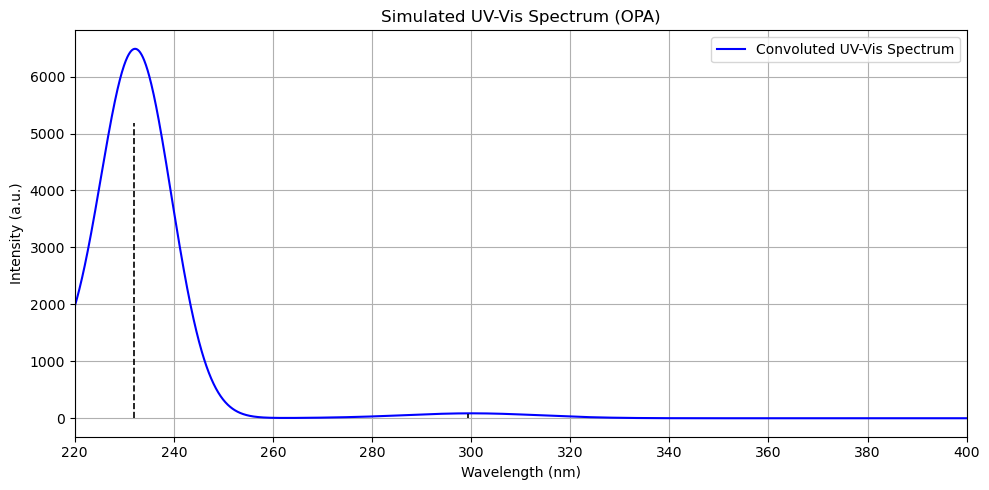

In [14]:
from psi4.driver.p4util import spectrum
# get poles and residues to plot OPA and ECD spectra

# extract poles (excitation energies in Hartree) and residues
poles = [r["EXCITATION ENERGY"] for r in res]  # excitation energies

# oscillator strengths for UV-Vis (OPA) spectrum
opa_residues = [r["OSCILLATOR STRENGTH (LEN)"] for r in res]

# rotatory strengths for ECD
ecd_residues = [r["ROTATORY STRENGTH (LEN)"] for r in res]

# generate spectra using psi4's built-in convolution function
opa_spectrum = spectrum(poles=poles, residues=opa_residues, gamma=0.02, out_units="nm")
print(opa_spectrum)
ecd_spectrum = spectrum(poles=poles, residues=ecd_residues, kind="ECD", gamma=0.01, out_units="nm")

# Extract convoluted spectrum data
x_conv = opa_spectrum['convolution']['x']
y_conv = opa_spectrum['convolution']['y']

print(x_conv, y_conv)

# Extract stick spectrum data
poles = opa_spectrum['sticks']['poles']       # wavelengths (nm)
residues = opa_spectrum['sticks']['residues'] # oscillator strengths

# Normalize stick heights for visual comparison
max_y = max(y_conv)
stick_heights = (residues / max(residues)) * max_y * 0.8  # 80% of max height

# Plot convoluted spectrum
plt.figure(figsize=(10, 5))
plt.plot(x_conv+50, y_conv, label="Convoluted UV-Vis Spectrum", color="blue")

# Plot stick spectrum
for pole, height in zip(poles, stick_heights):
    plt.vlines(pole+50, 0, height, colors='black', linestyles='dashed', linewidth=1.2)

# Annotate plot
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (a.u.)")
plt.title("Simulated UV-Vis Spectrum (OPA)")
plt.xlim(220,400)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

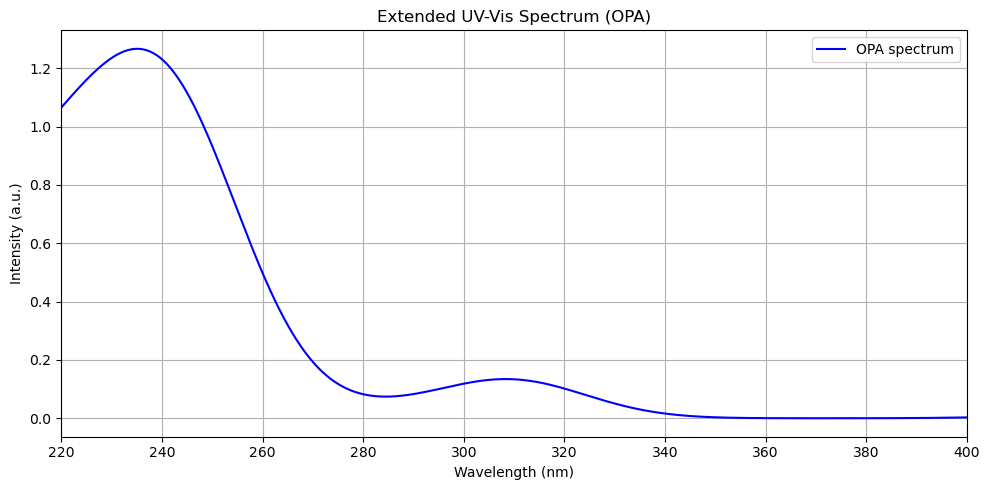

In [28]:
poles = np.array([r["EXCITATION ENERGY"] for r in res])  # Hartree energies
opa_residues = np.array([r["OSCILLATOR STRENGTH (LEN)"] for r in res])

hartree_to_nm = 45.56337117  # 1 Hartree = 27.2114 eV; wavelength conversion constant
poles_nm = hartree_to_nm / poles + 60

wavelength_grid = np.linspace(150, 400, 5000)  # Manually extend to 400 nm

def gaussian_lineshape(x, x0, gamma, intensity):
    return intensity * np.exp(-((x - x0) ** 2) / (2 * gamma ** 2))

gamma = 15  # adjust as needed
convoluted_spectrum = np.zeros_like(wavelength_grid)

for pole, intensity in zip(poles_nm, opa_residues):
    convoluted_spectrum += gaussian_lineshape(wavelength_grid, pole, gamma, intensity)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(wavelength_grid, convoluted_spectrum, color='blue', label='OPA spectrum')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (a.u.)")
plt.title("Extended UV-Vis Spectrum (OPA)")
plt.xlim(220, 400)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

x_sim_values = wavelength_grid
y_sim_values = convoluted_spectrum

### Save optimized geometry

In [16]:
# Define a filename for the XYZ file
filename = "molecule.xyz"

# Create the file and save the XYZ coordinates
with open(filename, 'w') as file:
    psi4_molecule.save_xyz_file(filename, 1)

print(f"File created: {filename}")

File created: molecule.xyz


In [17]:
# Import the XYZ file using ASE
mol = ase.io.read(filename)


### Add cell dimensions and PBC

In [18]:
# Set the cell dimensions to 100.0 Å in each direction
mol.set_cell((15.0, 15.0, 15.0))

# Enable periodic boundary conditions (PBC) in all three dimensions
mol.set_pbc((True, True, True))

<Axes: >

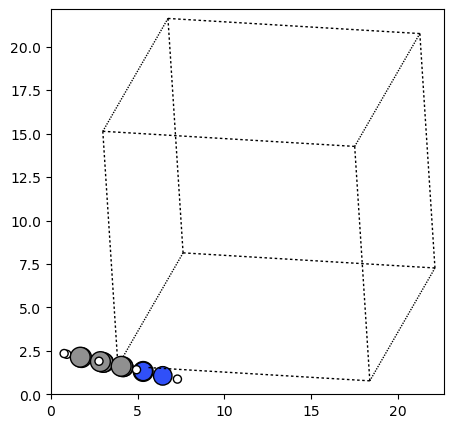

In [19]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(6, 5))

# Plot the molecule using ASE's plot_atoms function
plot_atoms(mol, ax, radii=0.75, rotation=('60x, 60y, 60z'))


### Make species

In [20]:
# Extract unique chemical symbols from the molecule
species_list = list(set(mol.get_chemical_symbols()))

# Print the list of unique species
print(species_list)

['N', 'C', 'H']


### Make formula

In [21]:
# Generate a formula string by extracting and sorting unique chemical symbols
formula_string = ''.join(sorted(set([atom.symbol for atom in mol])))

# Print the molecular formula string
print(formula_string)

CHN


### Get Experimental UV-vis data

In [19]:
# Extract Y-values starting from index 1 (excluding the first column) at row index 220 of the DataFrame
yvalues = uvvis_data.iloc[0, 1:].to_numpy()

# Display the Y-values as a numpy array
yvalues

array([0.2995391705069124, 0.3117872656432793, 0.3284910631631418,
       0.3499150568152918, 0.3765475427513453, 0.4086937060660624,
       0.4463535467594429, 0.4897915585802789, 0.5374207790358185,
       0.5897498499506617, 0.6445814386425367, 0.7010203355001475,
       0.7571133559170303, 0.8118432162439853, 0.8635619169693085,
       0.9096652119510484, 0.9487899410992768, 0.979918820764794,
       0.998555457218136, 1.0, 0.9804071169164098, 0.9383302306182032,
       0.8784773298338776, 0.8109724214402702, 0.7458276111128066,
       0.6894009216589861, 0.6449435916216518, 0.6131127862381868,
       0.5928484959461247, 0.5832433037303791, 0.5821141188797673,
       0.5876990061138747, 0.5984394868821273, 0.612762840662862,
       0.6288237149164302, 0.6452101199377422, 0.6602028463596504,
       0.6727622302926725, 0.6816288745790989, 0.6860540584531185,
       0.684865871150853, 0.6778038880581072, 0.6641519414858444,
       0.6436028117720064, 0.6160873236284473, 0.582657348348

In [20]:
import matplotlib.pyplot as plt

In [24]:
xvalues = np.arange(220,401,1)

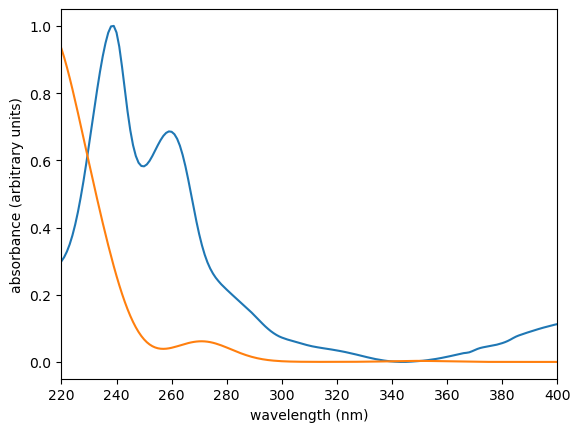

In [29]:
plt.xlabel('wavelength (nm)')
plt.ylabel('absorbance (arbitrary units)')
plt.plot(xvalues,yvalues)
plt.plot(x,y)
plt.xlim(220,400)
plt.show()

### Downsampling Approaches

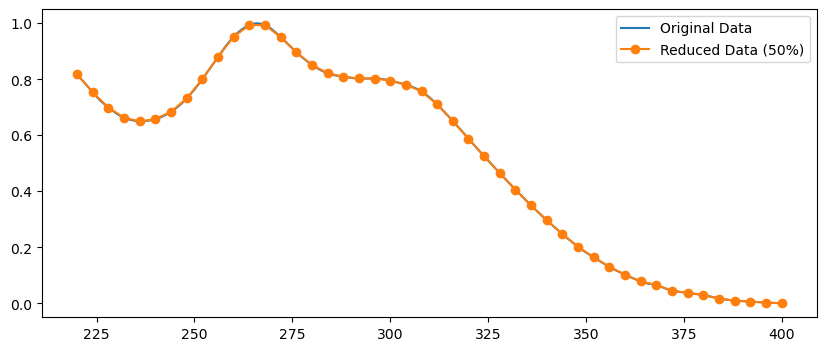

In [79]:
## Simple Subsampling

import numpy as np
import matplotlib.pyplot as plt

# Assuming xvalues and yvalues are your original numpy arrays
x_reduced = xvalues[::4]
y_reduced = yvalues[::4]

# Plotting to compare
plt.figure(figsize=(10, 4))
plt.plot(xvalues, yvalues, label='Original Data')
plt.plot(x_reduced, y_reduced, 'o-', label='Reduced Data (50%)')
plt.legend()
plt.show()


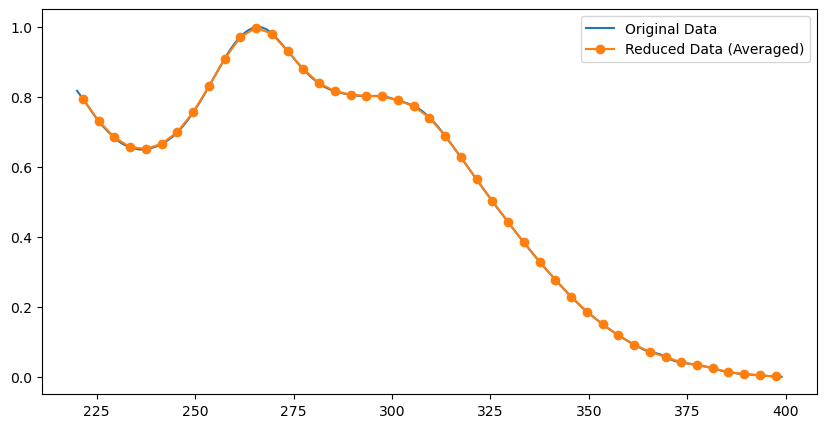

In [80]:
## Averaging Neighboring Points

import numpy as np
import matplotlib.pyplot as plt

# Ensure even number of data points
if len(xvalues) % 2 != 0:
    xvalues = xvalues[:-1]
    yvalues = yvalues[:-1]

# Reshape and average
x_reduced = xvalues.reshape(-1, 4).mean(axis=1)
y_reduced = yvalues.reshape(-1, 4).mean(axis=1)

# Plotting to compare
plt.figure(figsize=(10, 5))
plt.plot(xvalues, yvalues, label='Original Data')
plt.plot(x_reduced, y_reduced, 'o-', label='Reduced Data (Averaged)')
plt.legend()
plt.show()


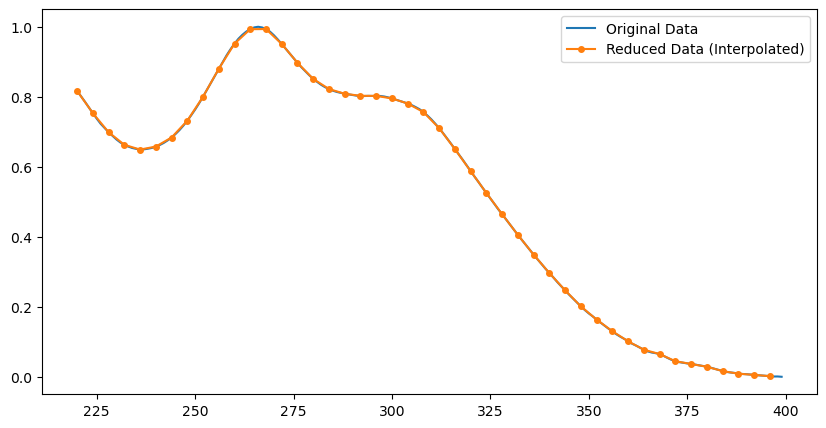

In [93]:
## Resampling Using Interpolation

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Create an interpolation function
interp_func = interp1d(xvalues, yvalues, kind='cubic')

# Generate new xvalues with 50% fewer points
num_points = len(xvalues) // 4
#print(num_points)
#x_reduced = np.arange(xvalues[0], xvalues[-1]+1, 4)
x_reduced_interp = np.linspace(xvalues[0], xvalues[-1], num_points)
y_reduced_interp = interp_func(x_reduced)
#print(x_reduced)

# Plotting to compare
plt.figure(figsize=(10, 5))
plt.plot(xvalues, yvalues, label='Original Data')
plt.plot(x_reduced, y_reduced_interp, 'o-', label='Reduced Data (Interpolated)', markersize=4)
plt.legend()
plt.show()


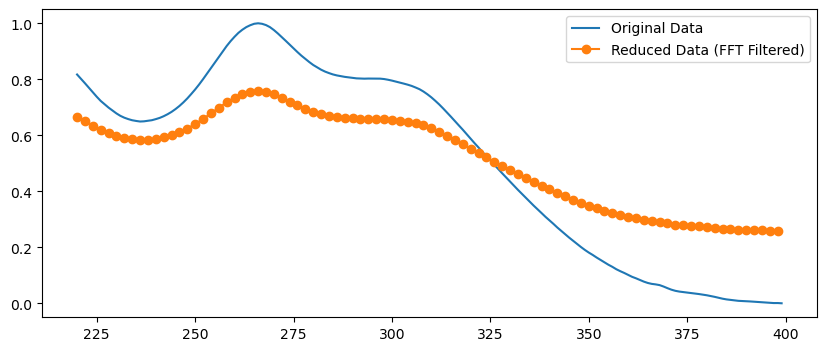

In [82]:
## Downsampling with Fourier Transform

import numpy as np
import matplotlib.pyplot as plt

# Perform FFT
y_fft = np.fft.fft(yvalues)
# Zero out the higher frequencies
y_fft[int(len(y_fft)/2):] = 0
# Perform inverse FFT
y_filtered = np.fft.ifft(y_fft).real

# Downsample
x_reduced = xvalues[::2]
y_reduced = y_filtered[::2]

# Plotting to compare
plt.figure(figsize=(10, 4))
plt.plot(xvalues, yvalues, label='Original Data')
plt.plot(x_reduced, y_reduced, 'o-', label='Reduced Data (FFT Filtered)')
plt.legend()
plt.show()


In [98]:
## Downsampling simulated data

In [ ]:
## Resampling Using Interpolation

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Create an interpolation function
interp_func = interp1d(xvalues, yvalues, kind='cubic')

# Generate new xvalues with 50% fewer points
num_points = len(xvalues) // 4
#print(num_points)
#x_reduced = np.arange(xvalues[0], xvalues[-1]+1, 4)
x_reduced_interp = np.linspace(xvalues[0], xvalues[-1], num_points)
y_reduced_interp = interp_func(x_reduced)
#print(x_reduced)

# Plotting to compare
plt.figure(figsize=(10, 5))
plt.plot(xvalues, yvalues, label='Original Data')
plt.plot(x_reduced, y_reduced_interp, 'o-', label='Reduced Data (Interpolated)', markersize=4)
plt.legend()
plt.show()

### Name molecule

In [83]:
import pubchempy

In [84]:
# Extract the SMILES string from the DataFrame at row index 220, column 0
smiles = uvvis_data.iloc[180, 0]

# Fetch compound information from PubChem using the SMILES string
compounds = pubchempy.get_compounds(smiles, namespace='smiles')

# Get the first matching compound
match = compounds[0]

# Print the IUPAC name of the compound
print(match.iupac_name)

name = match.iupac_name

None


### Combine data

In [31]:
mpid = 180

This function is useful for ensuring compatibility with formats that do not support numpy arrays directly, such as JSON or certain databases.

In [95]:
def atoms_to_dict(atoms):
    atoms_dict = atoms.todict()
    for key in atoms_dict:
        if isinstance(atoms_dict[key], np.ndarray ):
            atoms_dict[key] = [item.tolist() if hasattr(item, 'tolist') else item for item in atoms_dict[key]]
            
    return atoms_dict

#### Dictionary Construction for Material Properties

This code constructs a dictionary row containing various properties of a molecular or material structure. The dictionary includes:

- mp_id: The material project ID (mpid).
- structure: The structure of the molecule converted to a dictionary format using the atoms_to_dict function.
- name: The name of the molecule or material.
- phfreq: A list of phonon frequencies converted from numpy array xvalues to a list.
- phdos: A list of phonon density of states converted from numpy array yvalues to a list.
- pdos: An empty list for partial density of states.
- formula: The molecular formula string (formula_string).
- species: A list of unique chemical species present in the structure (species_list).

Finally, the constructed dictionary row is printed.

In [96]:
row = {'mp_id': mpid, 
        'structure': atoms_to_dict(mol), 
        'name': name,
        'phfreq': x_reduced_interp.tolist(), 
        'phdos': y_reduced_interp.tolist(),
        'pdos':[],
        'formula': formula_string,
        'species': species_list
        'exptfreq': yexpt_reduced_interp.tolist()
        'compfreq': ycomp_reduced_interp.tolist()}
print(row)

{'mp_id': 180, 'structure': {'numbers': [6, 8, 6, 8, 6, 6, 6, 6, 6, 6, 17, 6, 6, 6, 6, 6, 7, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'positions': [[0.870891916943, -2.595010327713, 4.50909229475], [0.488293409418, -2.024382240762, 3.227498600703], [1.013490505333, -0.827258337543, 2.885812914303], [1.778114089702, -0.238246176119, 3.607845405662], [0.558363131623, -0.354892414926, 1.551130829336], [-0.192612423729, -1.157957136837, 0.807038732087], [-0.697781827941, -0.941688239252, -0.562786076695], [0.008292600087, -0.232708006513, -1.529620684987], [-0.495034004223, -0.09524933237, -2.809167196934], [-1.707345379027, -0.665483823082, -3.114195562857], [-2.370543804232, -0.478847719953, -4.792928717479], [-2.42751419735, -1.38043336629, -2.189372386455], [-1.911300616228, -1.524754651228, -0.915468192555], [0.988718471383, 1.023775314796, 1.195481245972], [2.332017756517, 1.366964596641, 1.135639986542], [2.677567606463, 2.659465329539, 0.791664710534], [1.773768563146, 3.59751713

### Putting it all Together
OK. Now that we have that we can apply it to every molecule in the UV-vis dataset. The following cells will help us do that. First let's reload import all libraries again.

In [35]:
import pandas as pd
import numpy as np
import pubchempy 
import psi4
from ase import Atoms
import ase.io
from tempfile import NamedTemporaryFile

from ase import Atoms
from ase.optimize import BFGS
from ase.calculators.mopac import MOPAC

from openbabel import pybel


Now let's load the data from the CSV file to a pandas dataframe

In [30]:
uvvis_df = pd.read_csv("UV_w_SMILES.csv",header=None)
uvvis_df.head()

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
0,NC1=NC2=C(C=CC=C2)[N+]([O-])=N1,0.299539,0.311787,0.328491,0.349915,0.376548,0.408694,0.446354,0.489792,0.537421,...,0.092434,0.095006,0.097484,0.099952,0.102239,0.104428,0.106597,0.108721,0.110758,0.112611
1,NC1=NC2=C(C=CC=C2)N=N1,0.411922,0.447550,0.487158,0.530422,0.576958,0.626523,0.678088,0.731087,0.783621,...,0.094415,0.095031,0.095445,0.095832,0.095950,0.095919,0.095820,0.095594,0.095204,0.094772
2,CCC1=[N+]([O-])C2=C(C=CC=C2)[N+]([O-])=N1,0.732482,0.794217,0.853497,0.907398,0.952023,0.983787,1.000000,0.998714,0.982111,...,0.398864,0.409874,0.420358,0.429326,0.437889,0.445579,0.452843,0.459056,0.464107,0.468328
3,CN(C)CC1=CNC2=CC=C(C=C12)[N+]([O-])=O,0.412611,0.399813,0.390055,0.382307,0.376957,0.373062,0.371521,0.370622,0.371992,...,0.033980,0.029478,0.024774,0.020789,0.017146,0.013311,0.009733,0.006266,0.003120,0.000000
4,NC(=N)SCCN1C(=O)C2=CC=CC=C2C1=O,0.991241,1.000000,0.996943,0.979253,0.944010,0.890630,0.820660,0.739217,0.655266,...,0.000543,0.000694,0.000529,0.000495,0.000374,0.000433,0.000577,0.000560,0.000574,0.000412


In [31]:
def atoms_to_dict(atoms):
    atoms_dict = atoms.todict()
    for key in atoms_dict:
        if isinstance(atoms_dict[key], np.ndarray ):
            atoms_dict[key] = [item.tolist() if hasattr(item, 'tolist') else item for item in atoms_dict[key]]
            
    return atoms_dict

In [32]:
from openbabel import pybel


# Function to convert SMILES to XYZ
def smiles_to_xyz(smiles_string):
    # Convert SMILES to molecule
    mol = pybel.readstring("smi", smiles_string)
    
    # Add hydrogens
    mol.addh()
    
    # Generate 3D coordinates
    mol.make3D()
    
    # Optimize geometry
    mol.localopt()
    
    # Get XYZ coordinates
    xyz = mol.write("xyz")

    return xyz

In [133]:
# Set Psi4 options
psi4.set_memory('500 MB')
psi4.set_num_threads(1)
psi4.core.be_quiet()


def optimize_with_psi4(xyz_coordinates, max_retries=3):
    """
    Perform geometry optimization using Psi4 with retry mechanism.

    Parameters:
    xyz_coordinates (str): The XYZ coordinates of the molecule.
    max_retries (int): Maximum number of retries for optimization.

    Returns:
    e1: The optimized geometry of the molecule.
    """
    # Define the molecule using Psi4
    molecule = psi4.geometry(xyz_coordinates)

    # Perform initial energy calculation
    psi4.energy('scf/3-21G', molecule=molecule, return_geometry=True)

    # Attempt to optimize the geometry, retrying up to max_retries times
    #success = False
    #for attempt in range(max_retries):
    #    try:
    #        e1 = psi4.optimize('scf/3-21G', molecule=molecule, return_geometry=True)
    #        success = True
    #        break
    #    except psi4.OptimizationConvergenceError:
    #        print(f"Optimization attempt {attempt + 1} failed, retrying...")

    #if not success:
        #print(f"Skipping molecule after {max_retries} failed attempts.")
    #    return molecule

    return molecule

The following cell initializes an empty DataFrame with columns to store UV-Vis data and associated molecular information. The script defines the X-values for the UV-Vis spectrum.

The main part of the script iterates through each row in the uvvis_df DataFrame. For each SMILES string in the DataFrame, the script converts the SMILES to XYZ coordinates and fetches the compound name from PubChem. Using Psi4, it defines the molecular geometry and creates a temporary XYZ file for ASE to read the molecule's structure.

After reading the XYZ file, the script sets the cell dimensions and periodic boundary conditions. It then extracts the unique chemical species and formula, as well as Y-values from the DataFrame row. A dictionary is created for the new row, containing all relevant data, and this dictionary is appended to the DataFrame.


In [36]:
# Initialize the DataFrame
df = pd.DataFrame(columns=['uvvis_id', 'structure', 'name', 'phfreq', 'phdos', 'pdos', 'formula', 'species', 'smiles'])

# X-values for UV-Vis
xvalues = np.arange(220, 401, 1)

# Iterate through each row in the uvvis_df DataFrame
for index, row in uvvis_df.iterrows():
    
    smiles = row[0]

    # Get XYZ coordinates from SMILES
    xyz0 = smiles_to_xyz(smiles)

    # Get compound name from PubChem
    compounds = pubchempy.get_compounds(smiles, namespace='smiles')
    name = compounds[0].iupac_name

    # Define the molecule using Psi4
    molo = optimize_with_psi4(coordinates,'scf','sto-3g',3)
    #molo = optimize_with_psi4(xyz0, 0)

    # Define the molecule using ASE
    #molo = optimize_with_ase(xyz0)

    temp_filename = xyz0
    # Create a temporary XYZ file for ASE
    with NamedTemporaryFile(delete=False, suffix=".xyz") as file:
        molo.save_xyz_file(file.name, 1)
        temp_filename = file.name

    # Read the molecule from the XYZ file
    mol = ase.io.read(temp_filename)
    mol.set_cell((25.0, 25.0, 25.0))
    mol.set_pbc((True, True, True))

    # Extract species and formula
    species_list = list(set(mol.get_chemical_symbols()))
    formula_string = ''.join(sorted(set([atom.symbol for atom in mol])))

    # Extract Y-values from the row
    yvalues = row[1:].to_numpy()
    
    # Create an interpolation function
    interp_func = interp1d(xvalues, yvalues, kind='cubic')

    # Generate new xvalues with 50% fewer points
    #num_points = len(xvalues) // 4
    #x_reduced_interp = np.linspace(xvalues[0], xvalues[-1], num_points)
    #y_reduced_interp = interp_func(x_reduced)


    # Generate new xvalues with 75% fewer points
    x_reduced = np.arange(xvalues[0], xvalues[-1]+1, 4)
    y_reduced = interp_func(x_reduced)

    # Create a dictionary for the new row
    panda_row = {
        'uvvis_id': index,
        'structure': atoms_to_dict(mol),
        'name': name,
        'phfreq': x_reduced.tolist(),
        'phdos': y_reduced.tolist(),
        'pdos': [],
        'formula': formula_string,
        'species': species_list,
        'smiles': smiles
    }

    # Append the new row to the DataFrame
    new_data = pd.DataFrame([panda_row])
    df = pd.concat([df, new_data], ignore_index=True)


# Display the DataFrame
#print(df.head())


TORS::compute_val: unable to compute torsion value


Optimizer: Optimization failed!
Optimization attempt 1 failed, retrying...
Optimizer: Optimization complete!


NameError: name 'interp1d' is not defined

Let's check out the top of the database (the first five molecule entries) to see that everything worked as expected.

In [136]:

df.head()

,uvvis_id,structure,name,phfreq,phdos,pdos,formula,species,smiles
0,0,"{'numbers': [7, 6, 7, 6, 6, 6, 6, 6, 6, 7, 8, ...","1-oxido-1,2,4-benzotriazin-1-ium-3-amine","[220.0, 224.0909090909091, 228.1818181818182, ...","[0.2995391705069124, 0.3765475427513453, 0.537...",[],CHNO,"[H, C, N, O]",NC1=NC2=C(C=CC=C2)[N+]([O-])=N1
1,1,"{'numbers': [7, 6, 7, 6, 6, 6, 6, 6, 6, 7, 7, ...","1,2,4-benzotriazin-3-amine","[220.0, 224.0909090909091, 228.1818181818182, ...","[0.4119215356773526, 0.5769575685108583, 0.783...",[],CHN,"[H, C, N]",NC1=NC2=C(C=CC=C2)N=N1
2,2,"{'numbers': [6, 6, 6, 7, 8, 6, 6, 6, 6, 6, 6, ...","3-ethyl-1-oxido-1,2,4-benzotriazin-4-ium 4-oxide","[220.0, 224.0909090909091, 228.1818181818182, ...","[0.7324821401428788, 0.9520229479189808, 0.982...",[],CHNO,"[H, C, N, O]",CCC1=[N+]([O-])C2=C(C=CC=C2)[N+]([O-])=N1
3,3,"{'numbers': [6, 7, 6, 6, 6, 6, 7, 6, 6, 6, 6, ...","N,N-dimethyl-1-(5-nitro-1H-indol-3-yl)methanamine","[220.0, 224.0909090909091, 228.1818181818182, ...","[0.4126111781675612, 0.3769571209669825, 0.371...",[],CHNO,"[H, C, N, O]",CN(C)CC1=CNC2=CC=C(C=C12)[N+]([O-])=O
4,4,"{'numbers': [7, 6, 7, 16, 6, 6, 7, 6, 8, 6, 6,...","2-(1,3-dioxoisoindol-2-yl)ethyl carbamimidothi...","[220.0, 224.0909090909091, 228.1818181818182, ...","[0.991240815737678, 0.9440099202055489, 0.6552...",[],CHNOS,"[S, C, O, H, N]",NC(=N)SCCN1C(=O)C2=CC=CC=C2C1=O


Finally we can save the data to a csv file so that it can be read by our machine learning algorithm. 

In [137]:
df.to_csv('uvvis_to_downsample.csv', index=False)

Great! That's it. You're finished.